# 4.1 인스타그램 크롤링

## 4.1.1 크롤링 과정

In [9]:
from selenium import webdriver
driver = webdriver.Chrome('C:/Users/YHI/chromedriver.exe')

url = 'https://www.instagram.com/'
driver.get(url)

## 4.1.2 인스타그램 검색 결과 URL을 만들어서 접속하기

In [1]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

* 특정 URL에 접속

In [ ]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

## 4.1.3 첫 번째 게시글 열기
- selenium으로 크롬드라이버를 조작해서 첫 번째 게시글 클릭

In [2]:
import time

def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3) # 클릭한 후 정보를 로딩하는 데 시간이 소요되므로 3초 대기

## * 4.1.4 게시글 정보 가져오기
- 본문 내용, 작성 일시, 위치 정보, 본문에서 해시태그 추출

In [3]:
import re
from bs4 import BeautifulSoup

def get_content(driver):
    # 1. 현재 페이지의 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    # 2. 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
    
    # 3. 본문 내용에서 해시태그 가져오기(정규표현식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 4. 작성일자 정보 가져오기
    date = soup.select('a.c-Yi7 > time')[0]['datetime'][:10]
    
    # 5. 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button > span')[0].text
    except:
        like = 0
        
    # 6. 위치 정보 가져오기
    try:
        place = soup.select('div.JF9hh > a')[0].text
    except:
        place = ''
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    
    return data 

## 4.1.5 다음 게시글 열기

In [4]:
def move_next(driver):
    next_tag = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    next_tag.click()
    time.sleep(3)

## 4.1.6 여러 게시글 정보 수집하기
1. 크롬 브라우저 열기
2. 인스타그램 검색페이지 URL 만들기(insta_searching())
3. 검색페이지 접속하기
4. 첫 번째 게시물 출력하기
5. 비어있는 변수 results 만들기
6. 게시글 정보 가져오기(get_content())
7. 게시글 정보 변수 results에 추가하기
8. 다음 게시글 선택하기(move_next()) 반복하기
9. 게시글 정보 수집 완료

### * 인스타그램 크롤링 정리

In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 크롬 브라우저 열기
driver = webdriver.Chrome('C:/Users/YHI/chromedriver.exe')
time.sleep(2)

url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(2)

In [ ]:
# 인스타그램 검색페이지 URL 만들기
word = '제주도맛집' # 검색어
url = insta_searching(word)

# 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
select_first(driver)

# 비어있는 변수 results 만들기
results = []

# 여러 게시물 수집하기
target = 500
for i in range(target):
    data = get_content(driver)
    results.append(data)
    move_next(driver)
    time.sleep(2)

## 4.1.7 수집 데이터 저장

In [7]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.head(1)

,0,1,2,3,4
0,✨해월정 서귀포해월정의 푸짐한 한 상 차림💕다양하고 맛있는 진짜 보말의 맛을 만나세...,2020-11-27,0,,"[#제주도맛집, #제주맛집, #중문맛집, #제주중문맛집, #서귀포맛집, #천제연폭포..."


In [8]:
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('files/crawling_jejudoMatJip.xlsx')

### 반복문을 이용하여 여러 단어 한 번에 탐색

In [16]:
import pandas as pd

words = ['제주여행', '제주관광'] # 검색어
file_path = ['files/crawling_jejuYeoHang.xlsx', 'files/crawling_jejuGwanGwang.xlsx']

for j, word in enumerate(words):
    # 인스타그램 검색페이지 URL 만들기
    url = insta_searching(word)

    # 검색페이지 접속하기
    driver.get(url)
    time.sleep(3)

    # 첫 번째 게시글 열기
    select_first(driver)

    # 비어있는 변수 results 만들기
    results = []

    # 여러 게시물 수집하기
    target = 50
    for i in range(target):
        data = get_content(driver)
        results.append(data)
        move_next(driver)
        time.sleep(2)
        
    results_df = pd.DataFrame(results)
    
    results_df.columns = ['content', 'date', 'like', 'place', 'tags']
    results_df.to_excel(file_path[j], index=False)

## 4.1.8 여러 엑셀 파일의 중복을 제거한 후 통합 저장

In [40]:
import pandas as pd

jeju_insta_df = pd.DataFrame()

folder = 'files/'
f_list = ['crawling_jejudoMatJip.xlsx', 'crawling_jejuMatJip.xlsx', 'crawling_jejuYeoHang.xlsx', 'crawling_jejuGwanGwang.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp, ignore_index=True)
    
jeju_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

jeju_insta_df.head()

,content,date,like,place,tags
0,✨해월정 서귀포해월정의 푸짐한 한 상 차림💕다양하고 맛있는 진짜 보말의 맛을 만나세...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집', '#중문맛집', '#제주중문맛집', '#서귀포맛..."
1,11월 28일 토요일오전10시~밤12시까지 오늘도 정상 영업합니다뷰맛집ㆍ뷰카페상호 ...,2020-11-27,0,NaN,"['#제주성산맛집', '#성산일출봉맛집', '#제주맛집', '#성산맛집', '#제주..."
2,여러분이 편안하게 쉬어갈수있게 성산일출봉 뷰 빈백이준비 되어있고~👍⠀가성비 좋은 맛...,2020-11-27,0,NaN,"['#제주도맛집', '#성산일출봉카페', '#애월맛집', '#세화카페', '#제주공..."
3,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜제주도 여행 필수코스 산...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
4,<광고>지금 제주도여행중이시라면 차 한 잔에 천상의맛 카이막 드시러 오세요😘💙 사회...,2020-11-28,0,NaN,"['#쉬어갓', '#제주맛집', '#제주도맛집', '#표선맛집', '#성산맛집', ..."


In [43]:
# 중복 데이터 제거하고 저장하기
# content 데이터의 내용 중복성을 보고 제거
# inplace=True: 원본 데이터를 아예 변경
# 기본적으로 pandas는 복구가 용이하도록 inplace=False로 지정되어 있다.
jeju_insta_df.drop_duplicates(subset = ['content'], inplace=True)
jeju_insta_df.to_excel('files/insta_total_jeju_crawling.xlsx')

# 4.2 워드 클라우드
- 텍스트 내에서 출현하는 단어들의 출연 빈도수에 비례하는 크기로 표출한 그래프

## 4.2.1 워드 클라우드 만드는 과정
- 해시태그 데이터를 이용하여 빈도수를 집계한다.
- 그래프로 살펴봐 불필요한 해시태그는 제거하고 의미 있는 해시태크들로 워드 클라우드를 생성해본다.

## 4.2.2 해시태그 데이터 불러오기

In [23]:
import pandas as pd
raw_total = pd.read_excel('files/insta_total_jeju_crawling.xlsx')
raw_total['tags'][:3] # []기호가 포함된 문자열 데이터인 것을 확인

0    ['#제주도맛집', '#제주맛집', '#중문맛집', '#제주중문맛집', '#서귀포맛...
1    ['#제주성산맛집', '#성산일출봉맛집', '#제주맛집', '#성산맛집', '#제주...
2    ['#제주도맛집', '#성산일출봉카페', '#애월맛집', '#세화카페', '#제주공...
Name: tags, dtype: object

In [24]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

## 4.2.3 해시태그 출현 빈도 집계

In [6]:
from collections import Counter
# Counter를 이용하면 그룹 내 원소의 종류별로 빈도수를 집계할 수 있다.
tag_counts = Counter(tags_total)

In [7]:
# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(50)

[('#제주도맛집', 246),
 ('#제주맛집', 110),
 ('', 110),
 ('#제주도', 81),
 ('#제주도여행', 71),
 ('#제주여행', 65),
 ('#서귀포맛집', 54),
 ('#제주공항근처맛집', 50),
 ('#제주시맛집', 44),
 ('#제주', 38),
 ('#제주도카페', 36),
 ('#애월맛집', 33),
 ('#제주공항맛집', 31),
 ('#중문맛집', 26),
 ('#제주도가볼만한곳', 26),
 ('#제주카페', 25),
 ('#제주도민맛집', 25),
 ('#제주관광', 25),
 ('#제주가볼만한곳', 22),
 ('#제주흑돼지맛집', 22),
 ('#제주도맛집', 22),
 ('#제주도맛집추천', 21),
 ('#먹스타그램', 21),
 ('#제주도흑돼지맛집', 20),
 ('#jeju', 20),
 ('#제주핫플', 20),
 ('#협재맛집', 19),
 ('#제주흑돼지', 19),
 ('#제주도', 18),
 ('#일상', 17),
 ('#소통', 17),
 ('#제주현지인맛집', 16),
 ('#서귀포흑돼지맛집', 15),
 ('#중문흑돼지맛집', 15),
 ('#오설록맛집', 15),
 ('#맞팔', 15),
 ('#연동맛집', 15),
 ('#한림맛집', 14),
 ('#연동제주분식', 14),
 ('#제주맛집추천', 13),
 ('#맛스타그램', 13),
 ('#맛집', 13),
 ('#제주도여행코스', 13),
 ('#제주도여행', 13),
 ('#제주맛집', 13),
 ('#함덕맛집', 12),
 ('#제주도흑돼지맛집까망돼지', 12),
 ('#애월카페', 12),
 ('#서귀포', 12),
 ('#애월', 12)]

In [35]:
# 데이터 정재: '제주도맛집'과 관련 없는 해시태그 제외
STOPWORDS = ['#일상', '#소통', '#맞팔', '']

In [36]:
tag_total_selected = []

for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)

In [38]:
from collections import Counter
# Counter를 이용하면 그룹 내 원소의 종류별로 빈도수를 집계할 수 있다.
tag_counts = Counter(tag_total_selected)
# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(50)

[('#제주도맛집', 246),
 ('#제주맛집', 110),
 ('#제주도', 81),
 ('#제주도여행', 71),
 ('#제주여행', 65),
 ('#서귀포맛집', 54),
 ('#제주공항근처맛집', 50),
 ('#제주시맛집', 44),
 ('#제주', 38),
 ('#제주도카페', 36),
 ('#애월맛집', 33),
 ('#제주공항맛집', 31),
 ('#중문맛집', 26),
 ('#제주도가볼만한곳', 26),
 ('#제주카페', 25),
 ('#제주도민맛집', 25),
 ('#제주관광', 25),
 ('#제주가볼만한곳', 22),
 ('#제주흑돼지맛집', 22),
 ('#제주도맛집', 22),
 ('#제주도맛집추천', 21),
 ('#먹스타그램', 21),
 ('#제주도흑돼지맛집', 20),
 ('#jeju', 20),
 ('#제주핫플', 20),
 ('#협재맛집', 19),
 ('#제주흑돼지', 19),
 ('#제주도', 18),
 ('#제주현지인맛집', 16),
 ('#서귀포흑돼지맛집', 15),
 ('#중문흑돼지맛집', 15),
 ('#오설록맛집', 15),
 ('#연동맛집', 15),
 ('#한림맛집', 14),
 ('#연동제주분식', 14),
 ('#제주맛집추천', 13),
 ('#맛스타그램', 13),
 ('#맛집', 13),
 ('#제주도여행코스', 13),
 ('#제주도여행', 13),
 ('#제주맛집', 13),
 ('#함덕맛집', 12),
 ('#제주도흑돼지맛집까망돼지', 12),
 ('#애월카페', 12),
 ('#서귀포', 12),
 ('#애월', 12),
 ('#좋아요', 12),
 ('#제주여행', 12),
 ('#제주도핫플레이스', 12),
 ('#성산맛집', 11)]

## 4.2.4 막대차트로 해시태그 살펴보기

In [40]:
# 시각화 라이브러리 임포트 및 글꼴 설정
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name == 'AppleGothic'
    
rc('font', family = font_name)

In [42]:
# 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

In [43]:
tag_counts_df.head()

,tags,counts
0,#제주도맛집,246
1,#제주맛집,110
2,#제주도,81
3,#제주도여행,71
4,#제주여행,65


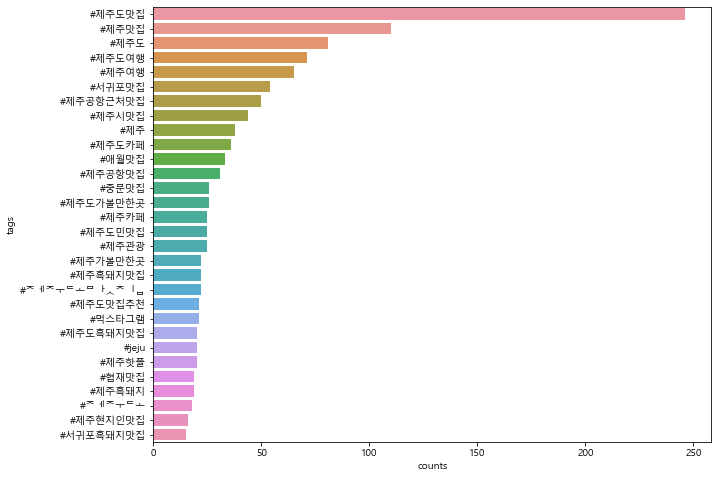

In [44]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y='tags', data=tag_counts_df)

## 4.2.5 워드 클라우드 그리기

In [47]:
# 워드 클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

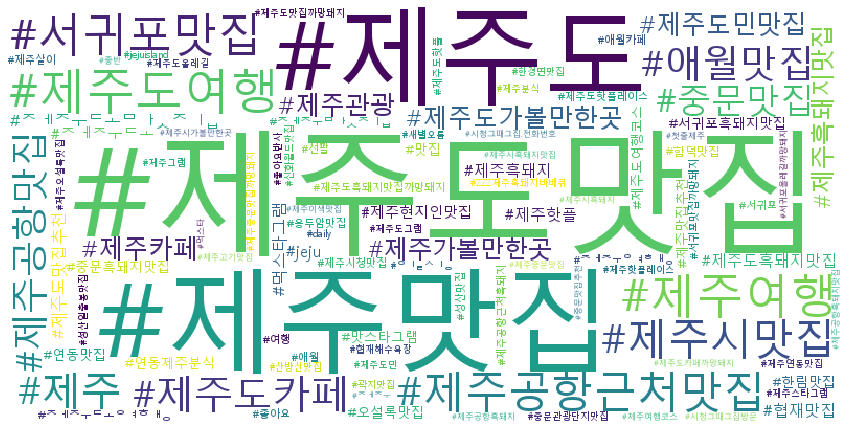

In [60]:
# 워드 클라우드 만들기
wordcloud = WordCloud(font_path = font_path, # 글꼴
                     background_color = 'white', # 배경색
                     max_words = 100, # 최대 표현 단어
                     relative_scaling = 0.3, # 글자들의 상대적 크기 #0부터 1까지
                     width = 800,
                     height = 400,
                     ).generate_from_frequencies(tag_counts)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/tag-wordcloud.png')

# 4.3 지도 시각화

## 4.3.1 지도 시각화 과정
- 위치 정보를 수집한 후 카카오 API를 활용해 위도/경도 좌표로 변환하고
- folium 라이브러리를 활용해 지도에 표시해본다.

## 4.3.2 데이터 준비

In [1]:
import pandas as pd
raw_total = pd.read_excel('files/insta_total_jeju_crawling.xlsx')
raw_total.head()

,Unnamed: 0,content,date,like,place,tags
0,0,✨해월정 서귀포해월정의 푸짐한 한 상 차림💕다양하고 맛있는 진짜 보말의 맛을 만나세...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집', '#중문맛집', '#제주중문맛집', '#서귀포맛..."
1,1,11월 28일 토요일오전10시~밤12시까지 오늘도 정상 영업합니다뷰맛집ㆍ뷰카페상호 ...,2020-11-27,0,NaN,"['#제주성산맛집', '#성산일출봉맛집', '#제주맛집', '#성산맛집', '#제주..."
2,2,여러분이 편안하게 쉬어갈수있게 성산일출봉 뷰 빈백이준비 되어있고~👍⠀가성비 좋은 맛...,2020-11-27,0,NaN,"['#제주도맛집', '#성산일출봉카페', '#애월맛집', '#세화카페', '#제주공..."
3,3,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜제주도 여행 필수코스 산...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
4,4,<광고>지금 제주도여행중이시라면 차 한 잔에 천상의맛 카이막 드시러 오세요😘💙 사회...,2020-11-28,0,NaN,"['#쉬어갓', '#제주맛집', '#제주도맛집', '#표선맛집', '#성산맛집', ..."


In [6]:
# 위치 정보별로 빈도수 집계
location_counts = raw_total['place'].value_counts()
location_counts

Jeju                           14
Jeju-do                        10
제주도                             7
환상의 섬 Jeju Island               6
서귀포 신시가지                        6
                               ..
은희네해장국                          1
성산일출봉 (Seongsan Ilchulbong)     1
제주 성산일출봉                        1
느루,온穩                           1
Road129                         1
Name: place, Length: 148, dtype: int64

In [3]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,14
Jeju-do,10
제주도,7
환상의 섬 Jeju Island,6
서귀포 신시가지,6


In [4]:
# 엑셀 파일로 저장
location_counts_df.to_excel('files/jeju_location_counts.xlsx')

In [7]:
# 위치 정보의 종류 확인
locations = list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 '제주도',
 '환상의 섬 Jeju Island',
 '서귀포 신시가지',
 'Jeju Island, South Korea - 제주도',
 '무릉외갓집',
 '제주 협재 해수욕장',
 '아르떼뮤지엄 Arte Museum',
 'Enough, 이너프',
 '제주도 Jeju Island',
 '제주고산리유적',
 'cafe_the_other_side',
 'Umu Pudding , 우무',
 '제주도 애월읍',
 '한라진칼국수',
 '제주귀더크',
 '김녕 성세기 해변',
 '칠돈가',
 '아부오름',
 '앤트러사이트 제주 한림점',
 'Busan, South Korea',
 '서귀포시',
 '이정의댁',
 '그림상회',
 'Brne_stay / 부르네스테이',
 '클랭블루제주',
 '비밀의숲',
 '성수동',
 '닭머르',
 '월정리해변',
 '소길역',
 '코코마마성산점',
 '빛의 벙커 Bunker de Lumières',
 'LOTTE HOTEL JEJU 롯데호텔제주',
 '제주 함덕 서우봉 해변',
 '오는정 김밥',
 '사려니숲길',
 '착한낙지 제주점',
 '카페차롱',
 '노형수산시장',
 '천연불맛 불쇼 미온당',
 '이호테우 목마등대',
 'Seoul, Korea',
 '금능해수욕장',
 '헤이요목장',
 '집!집이라고!!',
 '제주시청',
 '푸른섬 제주도',
 '용머리해안',
 '섭지코지로',
 '대월회관',
 '새별오름',
 '위미리 동백군락지',
 'Cafè 새빌',
 '애월해안도로',
 '용눈이오름',
 '테디스비치쉑',
 '뚱보집노형점',
 'Jeonju, Korea',
 '정이가네국밥',
 '이호테우해변',
 'cafe may飛 [카페 메이비] [cafe mayB.]',
 'Saeyeon Bridge, Jeju Island',
 '영도',
 'Seogwipo, Jeju Island, South Korea',
 '제주 크랩잭',
 '유군초밥',
 '곱들락',
 '머체왓숲길',
 '연돈',
 '제

## 4.3.3 카카오 API 가입

## 4.3.4 카카오 검색 API를 활용한 장소 검색

In [14]:
import requests

searching = '합정 스타벅스' # 검색어
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": "KakaoAK 58a8f4c82dcb71b7ce3b177750af00a6"
    # 입력시 반드시  KakaoAK 뒤에 한 칸 띄우고 API키 값을 적어야 합니다. 
}

# requests.get(url, headers = headers): url 주소에 정보 요청,
# header에 아이디 패스워드 함께 전달
# .json(): 전달받은 결과를 json형태로 불러옴
# ['place']: 그 중 place 항목만 선택
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91211392586314',
  'y': '37.54981773755399'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [15]:
# 카카오 API를 활용한 장소 검색 함수 만들기
def find_places(searching):
    # 1. 접속URL 만들기
    url = url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    # 2. headers 입력하기
    headers = {
        "Authorization" : "KakaoAK 58a8f4c82dcb71b7ce3b177750af00a6"
    }
    # 3. API 요청 & 정보 받기
    places = requests.get(url, headers=headers).json()['documents']
    # 4. 필요한 정보 선택하기
    place = places[0]
    name = place['place_name']
    x = place['x']
    y = place['y']
    data = [name, x, y, searching]
    
    return data

In [16]:
# 제주공항 검색 예시
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [17]:
# 반복작업 진행 시 진행바 표시하기위한 라이브러리 tqdm 활용
from tqdm.notebook import tqdm

In [18]:
# 인스타그램 위치명 위치정보 검색하기
# 검색 시 시간이 많이 걸려, 현재 작업 진행현황을 볼 수 있는 tqdm 활용
import time
locations_inform = []
for location in tqdm(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['제주도', '126.545875710283', '33.3797769227161', '제주도'],
 ['신시가지 횟집', '126.506076220117', '33.2530089473833', '서귀포 신시가지'],
 ['무릉외갓집', '126.236917142939', '33.2746792813178', '무릉외갓집'],
 ['협재해수욕장', '126.239157539085', '33.3938660776221', '제주 협재 해수욕장'],
 ['이너프라운지', '126.93565842163994', '37.5452225040192', 'Enough, 이너프'],
 ['제주도', '126.545875710283', '33.3797769227161', '제주도 Jeju Island'],
 ['제주고산리유적', '126.1666521275124', '33.30508436596465', '제주고산리유적'],
 ['디아더사이드', '126.926087648183', '35.1474232264864', 'cafe_the_other_side'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['한라진칼국수', '126.438262100061', '33.4954080745064', '한라진칼국수'],
 ['귀더크', '126.282366800118', '33.4423007490057', '제주귀더크'],
 ['김녕해수욕장', '126.759313988844', '33.5574388587079', '김녕 성세기 해변'],
 ['칠돈가 본점', '126.51071724442507', '33.50232582709983', '칠돈가'],
 ['아부오름', '126.777214998455', '33.4485841755621', '아부오름'],
 ['앤트러사이트 

## 4.3.5 위치 정보별 인스타 게시량 정리

In [22]:
# 위치정보 저장하기
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('files/insta_kakaoAPI_locations.xlsx', index=False)

In [23]:
# 인스타 게시량 및 위치정보 데이터 불러오기
location_counts_df = pd.read_excel('files/jeju_location_counts.xlsx', index_col = 0)
locations_inform_df = pd.read_excel('files/insta_kakaoAPI_locations.xlsx')

In [24]:
# 위치 데이터 병합하기
location_data = pd.merge(locations_inform_df, location_counts_df,
                        how = 'inner', left_on='name_official', right_index=True)
# inner: 양쪽에 모두 있는 데이터만
# left_on: 'name_official'칼럼의 데이터를 기준으로 병합
# right_index: 오른쪽 location_counts_df 데이터에서는 인덱스를 기준 병합하게 함

location_data.head()

,name_official,경도,위도,인스타위치명,place
1,제주도,126.545876,33.379777,제주도,7
6,제주도,126.545876,33.379777,제주도 Jeju Island,7
108,제주도,126.545876,33.379777,Jeju Island,7
3,무릉외갓집,126.236917,33.274679,무릉외갓집,4
7,제주고산리유적,126.166652,33.305084,제주고산리유적,3


In [25]:
# 데이터 중복 점검하기
location_data['name_official'].value_counts()

제주도          3
진행수산         1
한라진칼국수       1
호꼼스낵         1
은희네해장국       1
풀베개          1
닭머르          1
이정의댁         1
효퇴국수         1
해왓           1
유루유루         1
탱테일          1
웨딩카페나비인      1
노형수산시장       1
카페차롱         1
제주시청         1
명랑스낵         1
아부오름         1
인생밥집         1
도두해녀의집       1
방주교회         1
사려니숲길        1
무릉외갓집        1
용머리해안        1
연돈           1
새별오름         1
대월회관         1
허니문하우스       1
테디스비치쉑       1
유군초밥         1
짬뽕에취한날       1
그림상회         1
착한집          1
용출횟집         1
순천미향         1
비양도          1
금능해수욕장       1
소길역          1
대춘해장국 노형점    1
베케           1
용눈이오름        1
솔지식당         1
동백별장         1
비밀의숲         1
애월해안도로       1
제주고산리유적      1
찰리스          1
보래드베이커스      1
Name: name_official, dtype: int64

In [26]:
# 병합한 데이터 저장
location_data.to_excel('files/final_location_inform.xlsx', index = False)

## 4.3.6 folium을 이용한 지도 시각화1 - 개별 표시
- 지도 시각화를 위해서는 지도의 중심 위치 좌표와 위치별 위도/경도 데이터 필요

In [4]:
import pandas as pd
# 데이터 불러오기
location_data = pd.read_excel('files/final_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  50 non-null     object 
 1   경도             50 non-null     float64
 2   위도             50 non-null     float64
 3   인스타위치명         50 non-null     object 
 4   place          50 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [9]:
# 한라산을 중심 위치로 지정

import folium

Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data['name_official'][i] # 공식명칭
    count = location_data['place'][i] # 게시글 개수
    size = int(count) * 8
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long,lat), radius = size, color = 'red', popup=name).add_to(map_jeju)
    
    map_jeju

In [10]:
map_jeju.save('files/jeju_map.html')

## 4.3.7 folium을 이용한 지도 시각화2 - 그룹으로 표시

In [11]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i] # 행 하나씩
    locations.append((float(data['위도']), float(data['경도']))) # 위도 경도순
    names.append(data['name_official'])
    
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
    locations = locations, popups = names,
    name='Jeju',
    overlay=True,
    control=True
)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [12]:
map_jeju2.save('files/jeju2_map.html')

# 4.4 특정 단어 포함 게시글 찾기

## 4.4.1 데이터 준비

In [14]:
import pandas as pd
raw_total = pd.read_excel('files/insta_total_jeju_crawling.xlsx')
raw_total.head()

,Unnamed: 0,content,date,like,place,tags
0,0,✨해월정 서귀포해월정의 푸짐한 한 상 차림💕다양하고 맛있는 진짜 보말의 맛을 만나세...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집', '#중문맛집', '#제주중문맛집', '#서귀포맛..."
1,1,11월 28일 토요일오전10시~밤12시까지 오늘도 정상 영업합니다뷰맛집ㆍ뷰카페상호 ...,2020-11-27,0,NaN,"['#제주성산맛집', '#성산일출봉맛집', '#제주맛집', '#성산맛집', '#제주..."
2,2,여러분이 편안하게 쉬어갈수있게 성산일출봉 뷰 빈백이준비 되어있고~👍⠀가성비 좋은 맛...,2020-11-27,0,NaN,"['#제주도맛집', '#성산일출봉카페', '#애월맛집', '#세화카페', '#제주공..."
3,3,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜제주도 여행 필수코스 산...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
4,4,<광고>지금 제주도여행중이시라면 차 한 잔에 천상의맛 카이막 드시러 오세요😘💙 사회...,2020-11-28,0,NaN,"['#쉬어갓', '#제주맛집', '#제주도맛집', '#표선맛집', '#성산맛집', ..."


## 4.4.2 단어 선택하기

In [16]:
select_word = '갈치'

check_list = []
for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
        
select_df = raw_total[check_list]
select_df.head()

,Unnamed: 0,content,date,like,place,tags
7,7,(광고)제주도에서 해산물을 배터지게 먹고 싶다면~서귀포에 있는 큰갯물식당에서!-사장...,2020-11-27,0,NaN,"['#제주도맛집', '#제주맛집투어', '#제주맛집베스트', '#제주맛집추천', '..."
11,11,"❤넓은 주차장 (가게 앞, 뒤)❤단체환영❤포장가능❤쾌적하고 깔끔한 매장❤도민이 인정...",2020-11-28,0,NaN,"['#큰집어멍', '#제주은갈치', '#제주은갈치조림', '#제주롯데호텔맛집', '..."
13,13,서귀포시내 나 중문에 있으신분들 필독하세요~!!제주도에만 있는 흑돼지전문점 ‘까망돼...,2020-11-28,0,NaN,"['#서귀포흑돼지맛집', '#제주이색맛집', '#제주도갈치조림맛집', '#올레시장맛..."
22,28,우연히 길가다가 폭풍검색으로 방문한 까망돼지!!!여긴 특이하게 오겹으로 근고기가 두...,2020-11-28,0,NaN,"['#제주도카페', '#서귀포맛집까망돼지', '#중문맛집', '#중문흑돼지맛집', ..."
31,41,제주도에서 가장 오겹이 맛있는곳 까망돼지~ 업체명이 까망돼지에요!!육지체인점이아니라...,2020-11-28,0,NaN,"['#제주도맛집', '#중문맛집추천', '#서귀포흑돼지맛집', '#제주도맛집', '..."


In [17]:
# 선택 데이터 확인하기
for i in select_df.index:
    print(select_df.loc[i, 'content'])
    print('-'*50)

(광고)제주도에서 해산물을 배터지게 먹고 싶다면~서귀포에 있는 큰갯물식당에서!-사장님께서 잡아서 떠주셔서신선함도 최고! 비주얼, 실내 인테리어 전부 고급스러움의 끝판왕-한치회, 고등어회, 갈치회, 다금바리이 모든것이 전부 신선하고 상다리 부러지게 나온다!!제주도 필수 메뉴인 고등어회도 먹을 수 있고!다금바리는 제주도에서도 하는 집이 많지 않다구?바로가자!-큰갯물횟집＊064-738-1625＊제주 서귀포시 대포로 161＊단체석 , 주차 , 예약#제주도맛집 #제주맛집투어 #제주맛집베스트 #제주맛집추천 #제주맛 #휴애리근처맛집 #휴애리맛집 #여미지식물원맛집 #중문관광단지맛집
--------------------------------------------------
❤넓은 주차장 (가게 앞, 뒤)❤단체환영❤포장가능❤쾌적하고 깔끔한 매장❤도민이 인정한 맛집❤정성을 다한 반찬❤밥이 맛있는집, 돌솥밥!_✅전복해물탕✅♦산 전복이 폭탄처럼 들어있는 인기만점, 영양만점 해물탕!♦해장, 아침식사로 강추!_✅은갈치구이✅♦제주산 은갈치를 겉바속촉 구워냈습니다.♦전복장이 함께 나와요☺_✅은갈치조림✅♦제주산 은갈치를 매콤달콤한 비법 양념과 함께!_✅전복성게미역국✅♦해장, 아침식사로 강추!_✅옥돔구이/고등어구이/전복구이✅♦직화로 바로 구워 맛을 up! UP!_✅큰집어멍 예약문의운영시간:매일 09:00 - 22:00☎064-739-8295☑제주 서귀포시 중문관광로 336_#큰집어멍 #제주은갈치 #제주은갈치조림 #제주롯데호텔맛집 #제주해물탕 #중문아침식사 #제주신라호텔맛집 #제주여행 #중문카페 #중문갈치조림 #제주중문맛집 #중문맛집 #중문맛집추천 #제주맛집 #제주도맛집 #서귀포맛집 #제주갈치조림맛집 #제주갈치조림 #제주갈치구이 #제주은갈치구이 #서귀포갈치구이 #서귀포해물탕 #신화역사공원맛집 #중문해물탕 #중문갈치구이 #제주먹거리 #중문관광단지맛집 #서귀포갈치조림
--------------------------------------------------
서귀포시내 나 중문에 있으신분들 필독하세요

In [18]:
# 선택 데이터 저장하기
fpath = f'files/select_data_{select_word}.xlsx'
select_df.to_excel(fpath)

In [19]:
# 여러개의 단어 선택/추출/저장하기
select_word_list = ['바다','흑돼지','렌트','게스트하우스','회']

for select_word in select_word_list:
    check_list = []
    for content in raw_total['content']:
        if select_word in content:
            check_list.append(True)
        else:
            check_list.append(False)

    select_df = raw_total[check_list]
    fpath = f'files/4_select_data_{select_word}.xlsx'
    select_df.to_excel(fpath)